In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import time
import networkx as nx

from Algorithms.LAIM import *
from Algorithms.TIM  import *
from Diffusion.Model import *

In [7]:
n_seeds = 50
n_trials = 10
graph = nx.gnm_random_graph(15000, 31000, directed=False) # Approximates the NETHEPT topology.
ffm = {node: {factor: random.random() for factor in "OCEAN"} for node in graph.nodes()}
opinion = [random.random() for node in graph.nodes()]
model = BIC(graph, ffm, opinion)
data = { "algorithm": [], "time": []}

In [8]:
for i in range(n_trials):
    start = time.time()
    seed_set = TIM_solution(model, n_seeds)
    TIM_time = time.time() - start
    data["algorithm"].append("TIM")
    data["time"].append(TIM_time)

In [9]:
for i in range(n_trials):
    start = time.time()
    seed_set = LAIM_solution(model, n_seeds)
    LAIM_time = time.time() - start
    data["algorithm"].append("LAIM")
    data["time"].append(LAIM_time)

In [10]:

for i in range(n_trials):
    start = time.time()
    seed_set = fast_LAIM_solution(model, n_seeds)
    fast_LAIM_time = time.time() - start
    data["algorithm"].append("FastLAIM")
    data["time"].append(fast_LAIM_time)

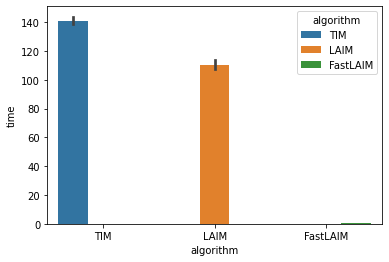

In [11]:
df = pd.DataFrame.from_dict(data)
sns.barplot(x="algorithm", y="time", hue="algorithm", data=df)
plt.show()